In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import utils
from tqdm import tqdm
import os
import h5py

In [4]:
os.chdir('/csiNAS/mridata/fastmri_brain/brain_multicoil_train/multicoil_train')

In [9]:
with h5py.File('file_brain_AXFLAIR_200_6002425.h5', 'r') as F:
    print(F.keys())
    kspace_data = np.array(F['kspace'])
    Rss_recon_image = np.array(F['reconstruction_rss'])

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>


In [10]:
print('kspace_data.shape:-',kspace_data.shape)
print('Rss_recon_image.shape:-',Rss_recon_image.shape)

kspace_data.shape:- (16, 20, 640, 320)
Rss_recon_image.shape:- (16, 320, 320)


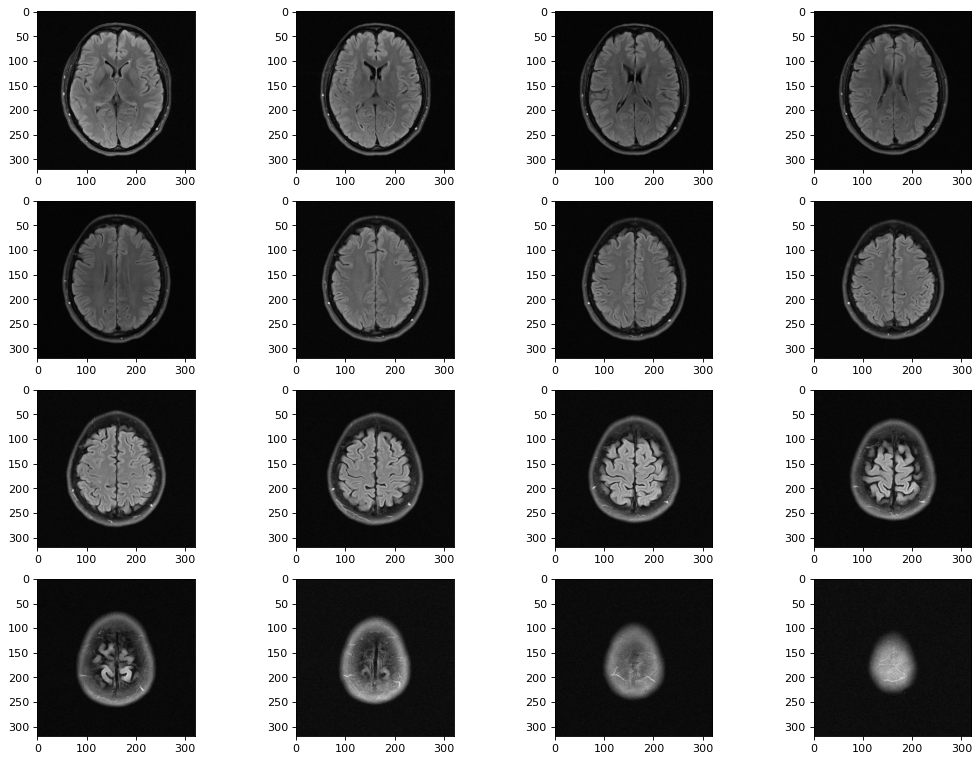

In [20]:
plt.figure(figsize=(16, 12), dpi=80)
for index in range(Rss_recon_image.shape[0]):
    plt.subplot(4,4,index+1)
    plt.imshow(np.flipud(Rss_recon_image[index,:,:]),cmap='gray')

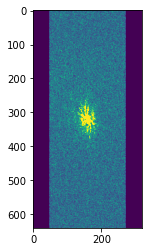

In [26]:
plt.imshow(np.abs(kspace_data[0,0,:,:]),vmax = 0.00001)

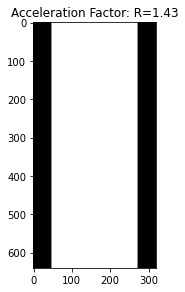

In [28]:
from bart import bart
import cfl 
mask = bart(1, 'pattern', kspace_data[0,0,:,:]).real
R = np.prod(np.shape(mask)) / np.sum(mask) # acceleration factor
###

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.tight_layout() # This automatically puts space between plots and make it tidy
axes.imshow(mask, cmap='gray')
plt.title('Acceleration Factor: R={:.2f}'.format(R))
plt.show()

In [40]:
# data_full = bart(1,'resize -c 2 {} 3 {}'.format(288,288), kspace_data) # reshape
data_full = kspace_data
data_full = np.moveaxis(data_full, [2, 3], [0, 1])#swap axises to bring X and  Y in first 2 dimensions
print('data_full.shape:-',data_full.shape)
data_full = np.flipud(data_full)

data_full.shape:- (640, 320, 16, 20)


In [41]:
# ifft of the ref k-space data
images_with_coils = bart(1,'fft -i -u 3', data_full)
print('images_with_coils.shape:-',images_with_coils.shape)

images_with_coils.shape:- (640, 320, 16, 20)


In [42]:
# RSS zero-filled reconstruction
images_coil_combined = bart(1, 'rss 8', images_with_coils)
print('images_coil_combined.shape',images_coil_combined.shape)


images_coil_combined.shape (640, 320, 16)


In [48]:
slice_images = bart(1,'resize -c 0 {} 1 {}'.format(288,288), images_coil_combined)

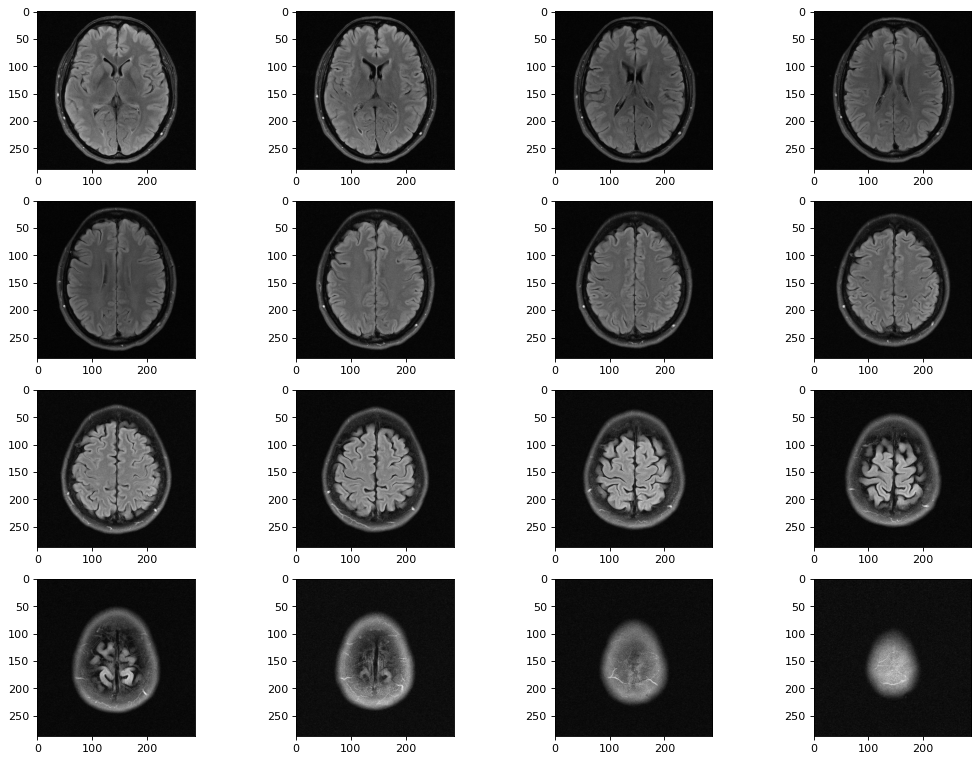

In [49]:
plt.figure(figsize=(16, 12), dpi=80)
for index in range(slice_images.shape[2]):
    plt.subplot(4,4,index+1)
    plt.imshow(np.abs(slice_images[:,:,index]),cmap='gray')